In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 93s 1us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


In [4]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [7]:

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)



Epoch 1/20
1563/1563 [==============================] - 293s 187ms/step - loss: 0.9570 - accuracy: 0.6673 - val_loss: 0.8346 - val_accuracy: 0.7092
Epoch 2/20
1563/1563 [==============================] - 287s 184ms/step - loss: 0.7466 - accuracy: 0.7425 - val_loss: 0.7653 - val_accuracy: 0.7469
Epoch 3/20
1563/1563 [==============================] - 289s 185ms/step - loss: 0.6259 - accuracy: 0.7844 - val_loss: 0.6577 - val_accuracy: 0.7768
Epoch 4/20
1563/1563 [==============================] - 289s 185ms/step - loss: 0.5395 - accuracy: 0.8160 - val_loss: 0.7219 - val_accuracy: 0.7585
Epoch 5/20
1563/1563 [==============================] - 290s 185ms/step - loss: 0.4515 - accuracy: 0.8452 - val_loss: 0.5882 - val_accuracy: 0.8103
Epoch 6/20
1563/1563 [==============================] - 290s 186ms/step - loss: 0.3831 - accuracy: 0.8678 - val_loss: 0.6257 - val_accuracy: 0.7951
Epoch 7/20
1563/1563 [==============================] - 289s 185ms/step - loss: 0.3206 - accuracy: 0.8894 - val_

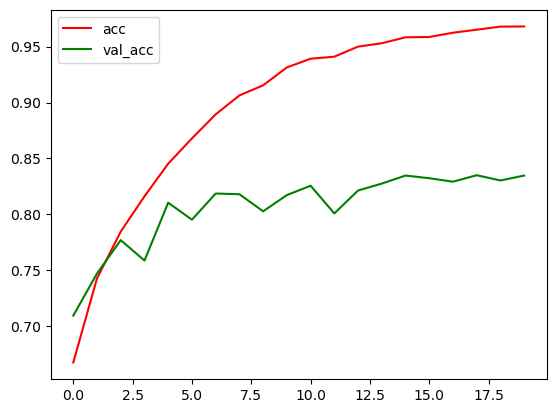

In [8]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


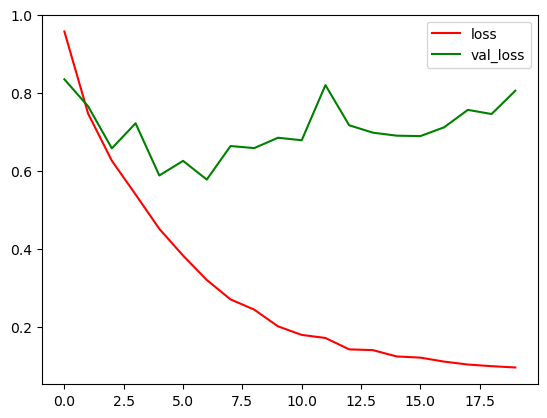

In [9]:
plt.plot(r.history['loss'], label='loss', color='red')
plt.plot(r.history['val_loss'], label='val_loss', color='green')
plt.legend()


1/1 [==============================] - 0s 22ms/step
Original label is cat and predicted label is cat


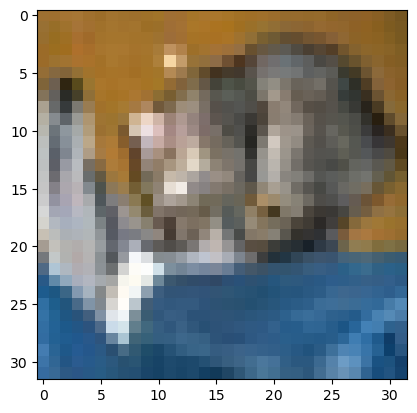

In [26]:
labels = '''airplane automobile bird cat deer dog frog horseship truck'''.split()

image_number = 0



# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

